In [2]:
import shutil
import warnings

warnings.filterwarnings('ignore')

import os

import numpy as np
import torch

import ViMST as vim 
from pathlib import Path
import scanpy as sc
import pandas as pd
from sklearn import metrics

from sklearn.metrics import homogeneity_score
 
from sklearn.metrics import adjusted_mutual_info_score
   
from sklearn.metrics import confusion_matrix
def purity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return np.sum(np.amax(cm, axis=0)) / np.sum(cm)

def train_one(args, adata, tissue_name=' '):
    net = vim.ViMST(adata,
                     tissue_name=tissue_name,
                     num_clusters=args.n_clusters,
                     genes_model='pca',
                     top_genes=args.top_genes,
                     rad_cutoff=200,
                     k_cutoff=args.k_cutoff,
                     graph_model='KNN',
                     device=torch.device('cuda:1' if torch.cuda.is_available() else 'cpu'),
                     learning_rate=args.learning_rate,
                     weight_decay=args.weight_decay,
                     max_epoch=args.max_epoch,
                     gradient_clipping=args.gradient_clipping,
                     feat_mask_rate=args.feat_mask_rate,
                     img_mask_rate=args.img_mask_rate,
                     edge_drop_rate=args.edge_drop_rate,
                     hidden_dim=args.hidden_dim,
                     latent_dim=args.latent_dim,
                     bn=args.bn,
                     att_dropout_rate=args.att_dropout_rate,
                     fc_dropout_rate=args.fc_dropout_rate,
                     use_token=args.use_token,
                     rep_loss=args.rep_loss,
                     rel_loss=args.rel_loss,
                     alpha=args.alpha,
                     lam=args.lam,
                     random_seed=args.seed, 
                     nps=args.nps,
                     n1=args.n1,
                     n2=args.n2)
    net.train()
    method = "kmeans"
    net.process(method=method)
    # net.clustering(method=method)
    adata = net.get_adata()

    adata.obs["refined_pred"] = vim.utils.spatial_domains_refinement_ez_mode(sample_id=adata.obs.index.tolist(),
                                                                       pred=adata.obs["kmeans"].tolist(), x_array=adata.obs['array_row'],
                                                                       y_array=adata.obs['array_col'], shape="hexagon")
    adata.obs["refined_pred"] = adata.obs["refined_pred"].astype('category')


    sub_adata = adata[~pd.isnull(adata.obs['Ground Truth'])]
    print(f"adata.obsm['eval_pred'].shape:{adata.obsm['eval_pred'].shape}")
    ARI = metrics.adjusted_rand_score(sub_adata.obs['Ground Truth'], sub_adata.obs["refined_pred"])
    NMI = metrics.normalized_mutual_info_score(sub_adata.obs['Ground Truth'], sub_adata.obs["refined_pred"])
    print(f"ARI:{ARI}\tNMI:{NMI}")
    return ARI, NMI, adata

adata.obsm['feat'].shape:(4226, 200)
adata_X 中细胞的个数为: 4226
值 cell_count 对应的键是 151507
gene_recon 维度: torch.Size([4226, 2000])
adata.obsm['feat1'].shape:(4226, 200)
------Calculating spatial graph...
The graph contains 50712 edges, 4226 cells.
12.0000 neighbors per cell on average.
(4226, 200)


Dataset_Name:151507, Ep 499: train loss:0.3699: 100%|██████████| 500/500 [00:55<00:00,  9.03it/s]


Calculateing adj matrix using xy only...
adata.obsm['eval_pred'].shape:(4226, 40)
ARI:0.6265944354049893	NMI:0.7393697137110863
Adjusted Mutual Information (AMI): 0.7379543540896841
hs: 0.7535420475935191
Purity: 0.8005205868433507
adata.obsm['feat'].shape:(4384, 200)
adata_X 中细胞的个数为: 4384
值 cell_count 对应的键是 151508
gene_recon 维度: torch.Size([4384, 2000])
adata.obsm['feat1'].shape:(4384, 200)
------Calculating spatial graph...
The graph contains 52608 edges, 4384 cells.
12.0000 neighbors per cell on average.
(4384, 200)


Dataset_Name:151508, Ep 499: train loss:0.3931: 100%|██████████| 500/500 [00:54<00:00,  9.18it/s]


Calculateing adj matrix using xy only...
adata.obsm['eval_pred'].shape:(4384, 40)
ARI:0.562146291179131	NMI:0.6989287073482654
Adjusted Mutual Information (AMI): 0.6956942140872544
hs: 0.7210142364090407
Purity: 0.7894616788321168
adata.obsm['feat'].shape:(4789, 200)
adata_X 中细胞的个数为: 4789
值 cell_count 对应的键是 151509
gene_recon 维度: torch.Size([4789, 2000])
adata.obsm['feat1'].shape:(4789, 200)
------Calculating spatial graph...
The graph contains 57468 edges, 4789 cells.
12.0000 neighbors per cell on average.
(4789, 200)


Dataset_Name:151509, Ep 499: train loss:0.3842: 100%|██████████| 500/500 [00:41<00:00, 12.18it/s]


Calculateing adj matrix using xy only...
adata.obsm['eval_pred'].shape:(4789, 40)
ARI:0.6054975703994065	NMI:0.7189102600809639
Adjusted Mutual Information (AMI): 0.7174177128738004
hs: 0.7466944936932266
Purity: 0.8588431822927542
adata.obsm['feat'].shape:(4634, 200)
adata_X 中细胞的个数为: 4634
值 cell_count 对应的键是 151510
gene_recon 维度: torch.Size([4634, 2000])
adata.obsm['feat1'].shape:(4634, 200)
------Calculating spatial graph...
The graph contains 55608 edges, 4634 cells.
12.0000 neighbors per cell on average.
(4634, 200)


Dataset_Name:151510, Ep 499: train loss:0.3846: 100%|██████████| 500/500 [00:39<00:00, 12.64it/s]


Calculateing adj matrix using xy only...
adata.obsm['eval_pred'].shape:(4634, 40)
ARI:0.5069958425291721	NMI:0.6650129604705137
Adjusted Mutual Information (AMI): 0.6553956874438316
hs: 0.6941790681899641
Purity: 0.7887354337505394
adata.obsm['feat'].shape:(3661, 200)
adata_X 中细胞的个数为: 3661
值 cell_count 对应的键是 151669
gene_recon 维度: torch.Size([3661, 2000])
adata.obsm['feat1'].shape:(3661, 200)
------Calculating spatial graph...
The graph contains 43932 edges, 3661 cells.
12.0000 neighbors per cell on average.
(3661, 200)


Dataset_Name:151669, Ep 499: train loss:0.4064: 100%|██████████| 500/500 [01:08<00:00,  7.31it/s]


Calculateing adj matrix using xy only...
adata.obsm['eval_pred'].shape:(3661, 40)
ARI:0.7822998709363806	NMI:0.7296340143472195
Adjusted Mutual Information (AMI): 0.7173499983868036
hs: 0.7314712819123421
Purity: 0.8667030865883638
adata.obsm['feat'].shape:(3498, 200)
adata_X 中细胞的个数为: 3498
值 cell_count 对应的键是 151670
gene_recon 维度: torch.Size([3498, 2000])
adata.obsm['feat1'].shape:(3498, 200)
------Calculating spatial graph...
The graph contains 41976 edges, 3498 cells.
12.0000 neighbors per cell on average.
(3498, 200)


Dataset_Name:151670, Ep 499: train loss:0.4026: 100%|██████████| 500/500 [00:42<00:00, 11.89it/s]


Calculateing adj matrix using xy only...
adata.obsm['eval_pred'].shape:(3498, 40)
ARI:0.7099324094128917	NMI:0.6739574719883866
Adjusted Mutual Information (AMI): 0.6666296298995201
hs: 0.6826043902900998
Purity: 0.8324757004002287
adata.obsm['feat'].shape:(4110, 200)
adata_X 中细胞的个数为: 4110
值 cell_count 对应的键是 151671
gene_recon 维度: torch.Size([4110, 2000])
adata.obsm['feat1'].shape:(4110, 200)
------Calculating spatial graph...
The graph contains 49320 edges, 4110 cells.
12.0000 neighbors per cell on average.
(4110, 200)


Dataset_Name:151671, Ep 499: train loss:0.4042: 100%|██████████| 500/500 [00:41<00:00, 12.12it/s]


Calculateing adj matrix using xy only...
adata.obsm['eval_pred'].shape:(4110, 40)
ARI:0.7582722823299893	NMI:0.76550688080597
Adjusted Mutual Information (AMI): 0.7593997332575353
hs: 0.7773174090820535
Purity: 0.8819951338199513
adata.obsm['feat'].shape:(4015, 200)
adata_X 中细胞的个数为: 4015
值 cell_count 对应的键是 151672
gene_recon 维度: torch.Size([4015, 2000])
adata.obsm['feat1'].shape:(4015, 200)
------Calculating spatial graph...
The graph contains 48180 edges, 4015 cells.
12.0000 neighbors per cell on average.
(4015, 200)


Dataset_Name:151672, Ep 499: train loss:0.3951: 100%|██████████| 500/500 [01:06<00:00,  7.49it/s]


Calculateing adj matrix using xy only...
adata.obsm['eval_pred'].shape:(4015, 40)
ARI:0.7585744395909386	NMI:0.720068285156486
Adjusted Mutual Information (AMI): 0.6868789605372437
hs: 0.660186905573528
Purity: 0.8361145703611457
adata.obsm['feat'].shape:(3639, 200)
adata_X 中细胞的个数为: 3639
值 cell_count 对应的键是 151673
gene_recon 维度: torch.Size([3639, 2000])
adata.obsm['feat1'].shape:(3639, 200)
------Calculating spatial graph...
The graph contains 43668 edges, 3639 cells.
12.0000 neighbors per cell on average.
(3639, 200)


Dataset_Name:151673, Ep 499: train loss:0.2954: 100%|██████████| 500/500 [01:21<00:00,  6.16it/s]


Calculateing adj matrix using xy only...
adata.obsm['eval_pred'].shape:(3639, 40)
ARI:0.6191708858122089	NMI:0.7357785039514951
Adjusted Mutual Information (AMI): 0.7314014053968375
hs: 0.7482659552344932
Purity: 0.7999450398461115
adata.obsm['feat'].shape:(3673, 200)
adata_X 中细胞的个数为: 3673
值 cell_count 对应的键是 151674
gene_recon 维度: torch.Size([3673, 2000])
adata.obsm['feat1'].shape:(3673, 200)
------Calculating spatial graph...
The graph contains 44076 edges, 3673 cells.
12.0000 neighbors per cell on average.
(3673, 200)


Dataset_Name:151674, Ep 499: train loss:0.3077: 100%|██████████| 500/500 [00:54<00:00,  9.09it/s]


Calculateing adj matrix using xy only...
adata.obsm['eval_pred'].shape:(3673, 40)
ARI:0.6013879298855936	NMI:0.7298831578065823
Adjusted Mutual Information (AMI): 0.7243440229312519
hs: 0.7332105201130822
Purity: 0.8110536346310917
adata.obsm['feat'].shape:(3592, 200)
adata_X 中细胞的个数为: 3592
值 cell_count 对应的键是 151675
gene_recon 维度: torch.Size([3592, 2000])
adata.obsm['feat1'].shape:(3592, 200)
------Calculating spatial graph...
The graph contains 43104 edges, 3592 cells.
12.0000 neighbors per cell on average.
(3592, 200)


Dataset_Name:151675, Ep 499: train loss:0.3371: 100%|██████████| 500/500 [00:51<00:00,  9.74it/s]


Calculateing adj matrix using xy only...
adata.obsm['eval_pred'].shape:(3592, 40)
ARI:0.6054468309493133	NMI:0.7229287810823171
Adjusted Mutual Information (AMI): 0.7148838243431523
hs: 0.7192237062571574
Purity: 0.7733853006681515
adata.obsm['feat'].shape:(3460, 200)
adata_X 中细胞的个数为: 3460
值 cell_count 对应的键是 151676
gene_recon 维度: torch.Size([3460, 2000])
adata.obsm['feat1'].shape:(3460, 200)
------Calculating spatial graph...
The graph contains 41520 edges, 3460 cells.
12.0000 neighbors per cell on average.
(3460, 200)


Dataset_Name:151676, Ep 499: train loss:0.3416: 100%|██████████| 500/500 [00:57<00:00,  8.76it/s]


Calculateing adj matrix using xy only...
adata.obsm['eval_pred'].shape:(3460, 40)
ARI:0.5784249299974501	NMI:0.7038888949923716
Adjusted Mutual Information (AMI): 0.6937071657980574
hs: 0.6987563194471499
Purity: 0.7771676300578034
n1=0.7 - mid_ari:0.6123	mid_nmi:0.7215	mid_ami:0.7161	mid_hs:0.7262	mid_purity:0.8058	mean_ari:0.6429	mean_nmi:0.7170	mean_ami:0.7084	mean_hs:0.7222	mean_purity:0.8180


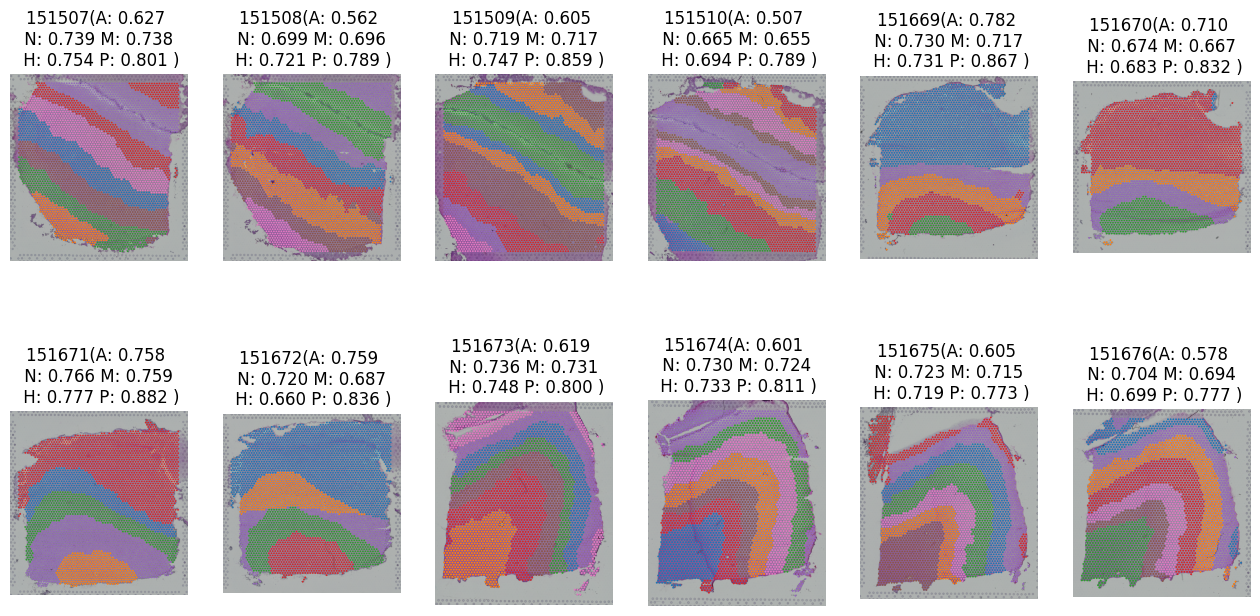

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import homogeneity_score, adjusted_mutual_info_score

def draw_cluster_spatial(adata, ax, name, title, ARI, NMI, ami, hs, purity, legend_loc='lower right'):
    sc.pl.spatial(adata, color=[name], show=False, ax=ax, legend_loc=legend_loc)
    ax.axis('off')
    ax.set_title('%s(A: %.3f \n N: %.3f M: %.3f \n H: %.3f P: %.3f )' % (title, ARI, NMI, ami, hs, purity))



# 初始化
fig, axs = plt.subplots(2, 6, figsize=(16, 8))
ari_list = []
nmi_list = []
ami_list = []
hs_list = []
purity_list = []

# 保持其他参数不变
args = vim.utils.build_args()
args.hidden_dim, args.latent_dim = 512, 256
args.max_epoch = 500
args.lam = 1.2
args.feat_mask_rate = 0.2
args.img_mask_rate = 0.3 
args.edge_drop_rate = 0.2
args.top_genes = 2000
args.k_cutoff = 12
args.nps = 20
args.n1 = 0.7
args.n2 = 0.3

section_id = ["151507", "151508", "151509", "151510", "151669", "151670", "151671", "151672",
                "151673", "151674", "151675", "151676"]

for id, tissue_name in enumerate(section_id):
    n_clusters = 5 if tissue_name in ['151669', '151670', '151671', '151672'] else 7
    args.n_clusters = n_clusters

    data_root = Path("/home/Data/DLPFC/")
    count_file = tissue_name + "_filtered_feature_bc_matrix.h5"
    adata = sc.read_visium(data_root / tissue_name, count_file=count_file)
    truth_path = f"/home/Data/DLPFC/{tissue_name}/{tissue_name}_truth.txt"
    Ann_df = pd.read_csv(truth_path, sep='\t', header=None, index_col=0)
    Ann_df.columns = ['Ground Truth']
    adata.obs['Ground Truth'] = Ann_df.loc[adata.obs_names, 'Ground Truth']

    ARI, NMI, adata = train_one(args, adata, tissue_name)
    adata.obs['Ground Truth1'] = adata.obs['Ground Truth'].astype(str)
    adata.obs['kmeans1'] = adata.obs['kmeans'].astype(str)
    ari_list.append(ARI)
    nmi_list.append(NMI)
    hs = homogeneity_score(adata.obs['Ground Truth1'], adata.obs['kmeans1'])
    purity = purity_score(adata.obs['Ground Truth1'], adata.obs['kmeans1'])
    ami = adjusted_mutual_info_score(adata.obs['Ground Truth1'], adata.obs['kmeans1'])

    print(f"Adjusted Mutual Information (AMI): {ami}")
    print(f"hs: {hs}")
    print(f"Purity: {purity}")

    ari_list.append(ARI) 
    nmi_list.append(NMI)
    ami_list.append(ami) 
    hs_list.append(hs)
    purity_list.append(purity)

    draw_cluster_spatial(adata, ax=axs[id // 6, id % 6], name='refined_pred', 
                            title=tissue_name, ARI=ARI, NMI=NMI, ami=ami, hs=hs, purity=purity, 
                            legend_loc=None)

mid_ari = np.median(ari_list)
mid_nmi = np.median(nmi_list)
mid_ami = np.median(ami_list)
mid_hs = np.median(hs_list)
mid_purity = np.median(purity_list)

mean_ari = np.mean(ari_list)
mean_nmi = np.mean(nmi_list)
mean_ami = np.mean(ami_list)
mean_hs = np.mean(hs_list)
mean_purity = np.mean(purity_list)


print(f"n1={args.n1:.1f} - mid_ari:{mid_ari:.4f}\tmid_nmi:{mid_nmi:.4f}\tmid_ami:{mid_ami:.4f}\t" \
        f"mid_hs:{mid_hs:.4f}\tmid_purity:{mid_purity:.4f}\tmean_ari:{mean_ari:.4f}\t" \
        f"mean_nmi:{mean_nmi:.4f}\tmean_ami:{mean_ami:.4f}\tmean_hs:{mean_hs:.4f}\t" \
        f"mean_purity:{mean_purity:.4f}")
